# Task 02 - Prediction using Unsupervised ML 

### Author: Ifrah Ishtiaq

**Task:** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Dataset:** https://bit.ly/3kXTdox
        
        

<img src="iris_types.jpg" width=500 height=500 />

## Importing

In [100]:
# Importing all required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

print('Import Completed')

Import Completed


## Loading DataSet

In [61]:
# Reading data from the given URL
iris_df = pd.read_csv("Iris.csv")
print("Data loaded successfully")

Data loaded successfully


## Data Analysis

In [62]:
# Seeing the first 10 rows of data
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [63]:
# Seeing the no of rows and columns
iris_df.shape

(150, 6)

In [64]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


No Null Values. So, we don't require data cleaning of any sort.

In [65]:
# No of unique species
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [66]:
# Dropping the label column because it is an Unsupervised learning problem 
iris = pd.DataFrame(iris_df)
df = iris.drop(columns= ['Species' ,'Id'] )
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding the optimum number of clusters

Before clustering the data using kmeans, we need to specify the number of clusters. 
We'll be using Elbow Method for this purpose.

### Elbow method

In this method, the number of clusters varies within a certain range. For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

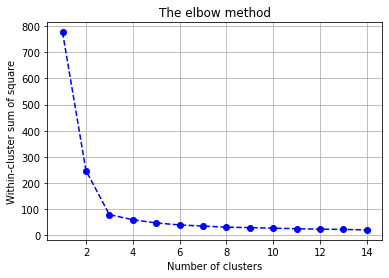

In [105]:
# Calculating the within-cluster sum of square
x = df.iloc[:, [0, 1, 2, 3]].values
wcss = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    wcss.append(km.inertia_)    
    
# Plotting the "within-cluster sum of square" against clusters range
plt.plot(clusters_range, wcss, 'go--', color='blue')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()


From the above graph, the optimum clusters is where the elbow occurs. This is when that after the elbow point, the WCSS value doesn't decrease significantly with every iteration.

From this we choose the number of clusters **k** as **' 3 '**

## Applying k-means Clustering on the Data

In [70]:
# Applying kmeans to our dataset
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(x)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Visualising the clusters

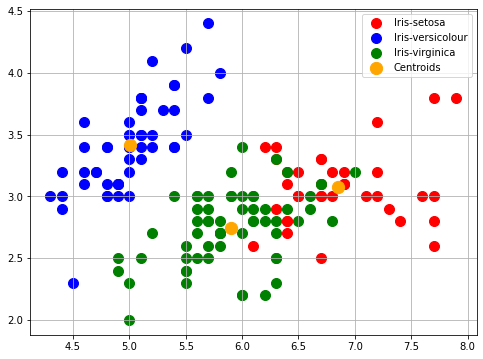

In [86]:
plt.figure(figsize = (8,6))

plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the cluster's centroids

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 150, c = 'orange', label = 'Centroids')
plt.grid()
plt.legend()
plt.show()